In [ ]:
# Overall theme on how sports changed over time in relation to earnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


In [6]:
df.sport.unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'f1',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [1]:
#--------------------------------------------------------------------------------#

## (1) which industries have higher earnings, and is it significant

In [18]:
df['sport'].unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'f1', 'hockey', 'american football',
       'soccer', 'cycling', 'motorcycle gp', 'mma'], dtype=object)

In [20]:
df['log_earnings'] = np.log(df['earnings'])

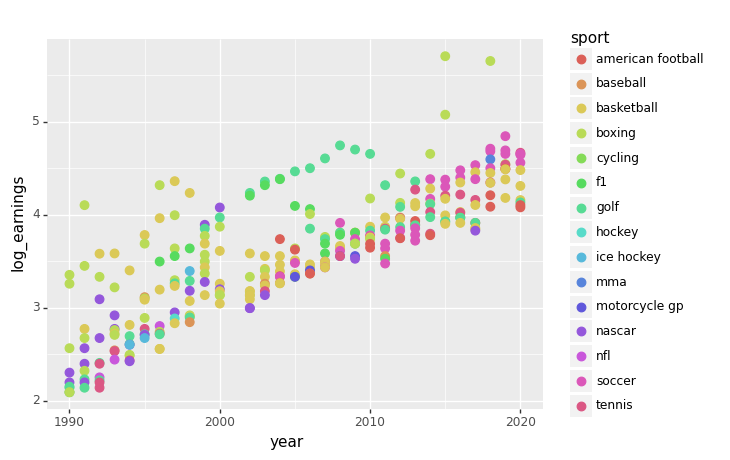

<ggplot: (137735567062)>

In [25]:
(ggplot(df, aes(x='year', y='log_earnings', color = 'sport')) + 
geom_point(size = 3)
)   

#### At a glance, we see that among the different sports: Golf, Boxing, and Basketball all seem to have periods of many high earners compared to the rest of the industry. NFL also has many high earners in the years 2014 and onwards. 

(A regression test will follow)

In [30]:
reg_inc_sport = smf.ols('earnings ~ sport',df).fit()
#a basic linear regression, where each industry is a dummy variable. "amaerican football" is the base-group. 

In [33]:
reg_inc_sport.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     3.165
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           0.000122
Time:                        15:52:45   Log-Likelihood:                -1462.1
No. Observations:                 301   AIC:                             2954.
Df Residuals:                     286   BIC:                             3010.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.0118      7.749      6.841      0.000      37.759      68.264
sport[T.baseball]        -28.9261     14.348     -2.016      0.045     -57.168      -0.684
sport[T.basketball]      -11.1423      8.514     -1.309      0.192     -27.901       5.617
sport[T.boxing]           -3.0379      9.069     -0.335      0.738     -20.887      14.812
sport[T.cycling]         -25.0118     32.876     -0.761      0.447     -89.722      39.698
sport[T.f1]               -3.3964     11.772     -0.289      0.773     -26.566      19.774
sport[T.golf]             -4.4549      9.124     -0.488      0.626     -22.414      13.504
sport[T.hockey]          -35.1118     32.876     -1.068      0.286     -99.822      29.598
sport[T.ice hockey]      -33.7451     20.008     -1.687      0.093     -73.126       5.636
sport[T.mma]              45.9882     32.876      1.399      0.163     -18.722     110.698
sport[T.motorcycle gp]   -21.0118     17.755     -1.183      0.238     -55.959      13.936
sport[T.nascar]          -30.9248     10.219     -3.026      0.003     -51.039     -10.811
sport[T.nfl]             -40.5118     20.008     -2.025      0.044     -79.893      -1.130
sport[T.soccer]           14.3670      9.538      1.506      0.133      -4.407      33.141
sport[T.tennis]           -8.7813     10.219     -0.859      0.391     -28.896      11.333
==============================================================================
Omnibus:                      263.110   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7183.415
Skew:                           3.417   Prob(JB):                         0.00
Kurtosis:                      25.936   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
reg_inc_sport.params

Intercept                 53.011765
sport[T.baseball]        -28.926050
sport[T.basketball]      -11.142253
sport[T.boxing]           -3.037852
sport[T.cycling]         -25.011765
sport[T.f1]               -3.396380
sport[T.golf]             -4.454947
sport[T.hockey]          -35.111765
sport[T.ice hockey]      -33.745098
sport[T.mma]              45.988235
sport[T.motorcycle gp]   -21.011765
sport[T.nascar]          -30.924808
sport[T.nfl]             -40.511765
sport[T.soccer]           14.367023
sport[T.tennis]           -8.781330
dtype: float64

#### In the regression only Soccer has a higher coefecient than american football, with Boxing, f1, and golf just slightly lower. Meaning that Soccer players are predicted to have the highest incomes, followed by American Football players, and then boxers, f1 racers, and golfers all following. 

#### However, the simple linear regression has limited explanitory capacity with only an R-sq of 0.11, and overall individual earnings with industry may not be that correlated 

## (2) do individual player's earnings correlate to overall industry trends

In [50]:
df_industry_income = df.groupby(['sport','year'])['earnings'].mean().reset_index()
df_industry_income.columns = ['sport', 'year', 'avg_earnings_by_sport']
df_industry_income.head()
#here we create the industry average income and merge into the origional df

,sport,year,avg_earnings_by_sport
0,american football,2004,42.0
1,american football,2005,37.5
2,american football,2006,29.0
3,american football,2010,39.1
4,american football,2012,42.4


In [55]:
df_afQ2 = pd.merge(df, df_industry_income, on=['sport','year'])
df_afQ2['log_avg_earnings_by_sport'] = np.log(df_afQ2['avg_earnings_by_sport'])
df_afQ2.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings,log_earnings,avg_earnings_by_sport,log_avg_earnings_by_sport
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6,3.353407,18.925,2.940484
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0,3.258097,18.925,2.940484
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0,2.564949,18.925,2.940484
3,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1,2.091864,18.925,2.940484
4,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0,2.302585,9.500,2.251292


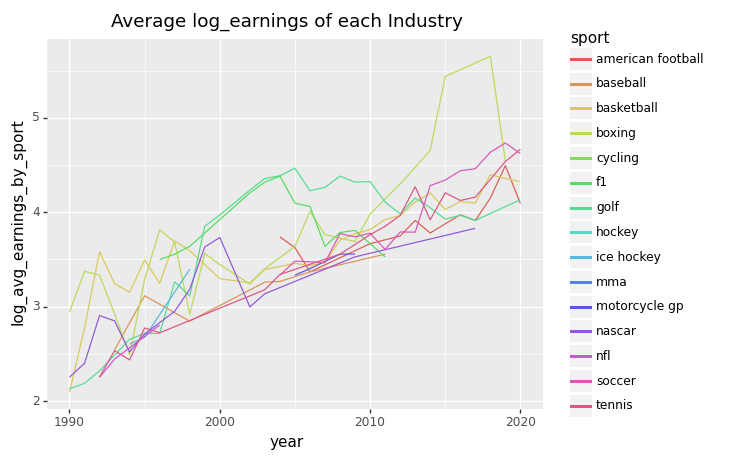

<ggplot: (137740647903)>

In [101]:
# plot the trends of average earnings in each industry
(ggplot(df_afQ2, aes(x='year', y='log_avg_earnings_by_sport', color = 'sport')) + 
geom_line() + labs(title='Average log_earnings of each Industry')
)   

In [128]:
#lets see for example how the top 3 most frequent player's earnings compare to their industry average
df['name'].value_counts().head(5)

Tiger Woods           19
Michael Jordan        19
Kobe Bryant           14
LeBron James          13
Michael Schumacher    13
Name: name, dtype: int64

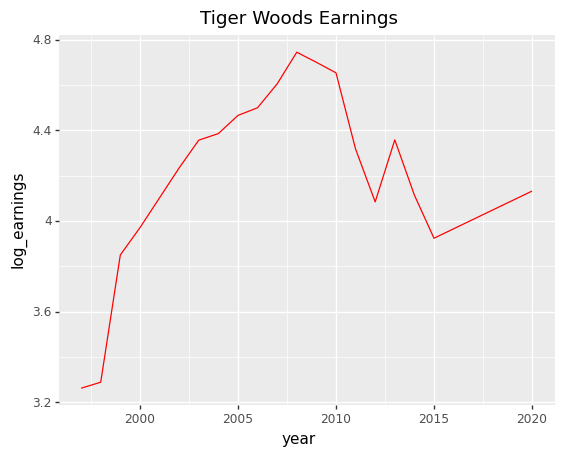

<ggplot: (137735545323)>

In [121]:
#Now we plot the trends of individual top earners of each sport versus their sport earning average
#this for example is the yearly earnings of tiger woods
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Tiger Woods'], aes(x='year', y='log_earnings')) + 
    geom_line(color='red') + labs(title='Tiger Woods Earnings')
)   

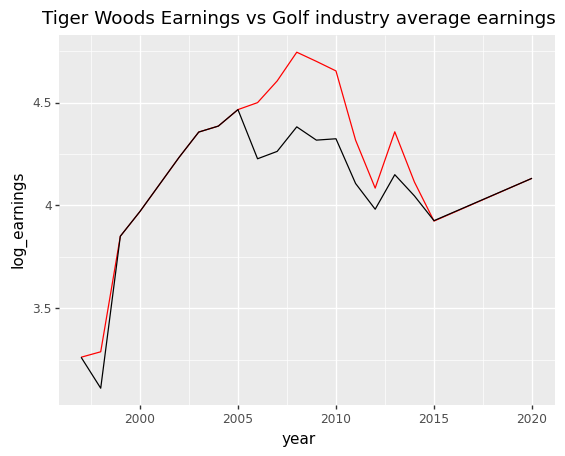

<ggplot: (137735473351)>

In [123]:
#this is Tiger wood's average earnings compared to indusrty average
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Tiger Woods'], aes(x='year', y='log_earnings')) + 
    geom_line(color= 'red') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Tiger Woods Earnings vs Golf industry average earnings')
)   

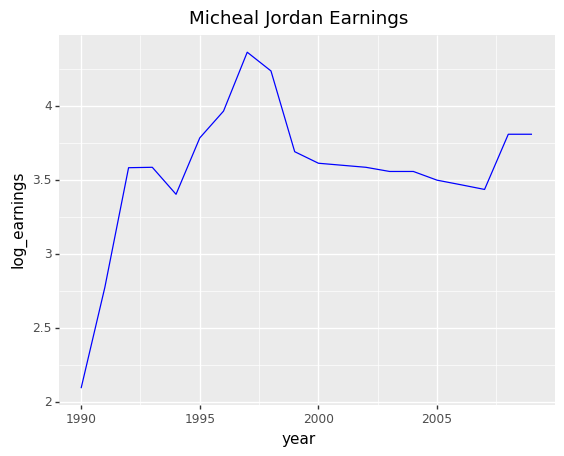

<ggplot: (137734763530)>

In [124]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Michael Jordan'], aes(x='year', y='log_earnings')) + 
    geom_line(color= 'blue') + labs(title='Micheal Jordan Earnings')
)   

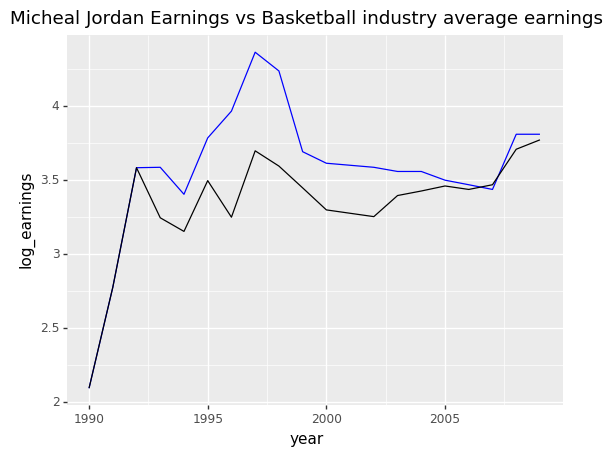

<ggplot: (137739748346)>

In [125]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Michael Jordan'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'blue') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Micheal Jordan Earnings vs Basketball industry average earnings')
)   

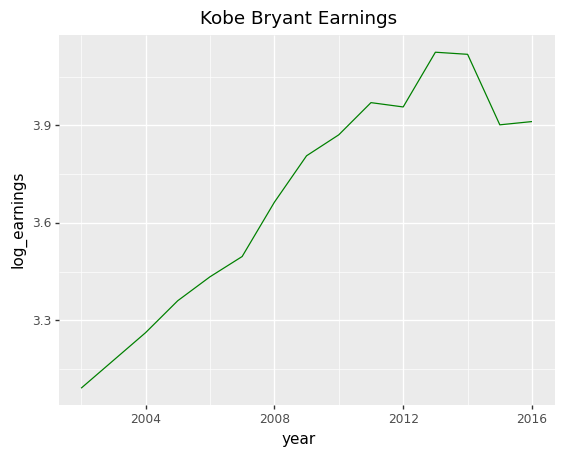

<ggplot: (137735485715)>

In [126]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Kobe Bryant'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'green') + labs(title='Kobe Bryant Earnings')
)   

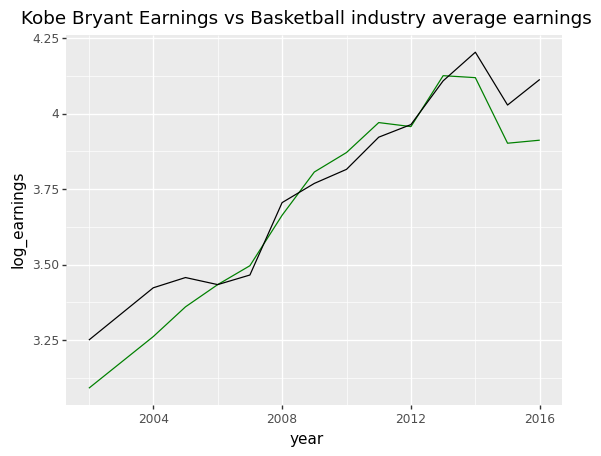

<ggplot: (137739108858)>

In [127]:
(ggplot(df_afQ2.loc[df_afQ2['name'] =='Kobe Bryant'], aes(x='year', y='log_earnings')) + 
    geom_line(color = 'green') + 
    geom_line(aes(x='year', y='log_avg_earnings_by_sport')) + labs(title='Kobe Bryant Earnings vs Basketball industry average earnings')
)   

#### We can see it does seem to track closely, but much of that may be due to the small sample size: for example there aren't that many top earners in one given sport per year, so the average of the sport per year is often dictated by just a few players. 

#### but for our playes with the most numerous top earning spots, thde don't deviate too radically

## (3) does being ranked high effect subsequent earnings and how?
(does this question even make sense to ask? --since the rank is arbitray, even if one's earnings are the same, their rank could change depending on the earnings of other atheletes)

In [120]:
#---------------------------------------------------